# Mini Project 2
Data Set Information:

Seven different types of dry beans were used in this project, taking into account the features
such as form, shape, type, and structure by the market situation. Use best machine learning
algorithm to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay,
Cali, Dermason, Horoz, Seker and Sira, depending only on dimension and shape features of
bean varieties with no external discriminatory features.

# Features Information:
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be
drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while
standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain
the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean
seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to
those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

# Importing Liberaries for Data Processing, Loading 

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics # for calculating rootmean square

# Importing Data Visualization Liberies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Machine Learning Liberaries

In [3]:
# Models to be used
from lazypredict.Supervised import LazyClassifier # for checking best model


# Evaluation of the model
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score


# Preprocessing of the data
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

 # Loading the Data

In [4]:
df=pd.read_csv("data.csv")

# Exploratory Data Analysis (EDA)

In [5]:
df.head() # previewing data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395     610.29           208.18           173.89          1.20   
1  28734     638.02           200.52           182.73          1.10   
2  29380     624.11           212.83           175.93          1.21   
3  30008     645.88           210.56           182.52          1.15   
4  30140     620.13           201.85           190.28          1.06   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0          0.55       28715         190.14    0.76      0.99       0.96   
1          0.41       29172         191.27    0.78      0.98       0.89   
2          0.56       29690         193.41    0.78      0.99       0.95   
3          0.50       30724         195.47    0.78      0.98       0.90   
4          0.33       30417         195.90    0.77      0.99       0.98   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0         0.91          0.01          0.00          0.83          1.00  SEKER  
1         0.95          0.01          0.00          0.91          1.00  SEKER  
2         0.91          0.01          0.00          0.83          1.00  SEKER  
3         0.93          0.01          0.00          0.86          0.99  SEKER  
4         0.97          0.01          0.00          0.94          1.00  SEKER

In [6]:
df.size

231387

In [7]:
df.shape

(13611, 17)

# Description and Information About Dataset

In [8]:
df.describe()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
count  13611.00   13611.00         13611.00         13611.00      13611.00   
mean   53048.28     855.28           320.14           202.27          1.58   
std    29324.10     214.29            85.69            44.97          0.25   
min    20420.00     524.74           183.60           122.51          1.02   
25%    36328.00     703.52           253.30           175.85          1.43   
50%    44652.00     794.94           296.88           192.43          1.55   
75%    61332.00     977.21           376.50           217.03          1.71   
max   254616.00    1985.37           738.86           460.20          2.43   

       Eccentricity  ConvexArea  EquivDiameter   Extent  Solidity  roundness  \
count      13611.00    13611.00       13611.00 13611.00  13611.00   13611.00   
mean           0.75    53768.20         253.06     0.75      0.99       0.87   
std            0.09    29774.92          59.18     0.05      0.00       0.06   
min            0.22    20684.00         161.24     0.56      0.92       0.49   
25%            0.72    36714.50         215.07     0.72      0.99       0.83   
50%            0.76    45178.00         238.44     0.76      0.99       0.88   
75%            0.81    62294.00         279.45     0.79      0.99       0.92   
max            0.91   263261.00         569.37     0.87      0.99       0.99   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
count     13611.00      13611.00      13611.00      13611.00      13611.00  
mean          0.80          0.01          0.00          0.64          1.00  
std           0.06          0.00          0.00          0.10          0.00  
min           0.64          0.00          0.00          0.41          0.95  
25%           0.76          0.01          0.00          0.58          0.99  
50%           0.80          0.01          0.00          0.64          1.00  
75%           0.83          0.01          0.00          0.70          1.00  
max           0.99          0.01          0.00          0.97          1.00

In [9]:
df.info() # for Columns /features data type and having null value or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Data Preprocessing

## Finding Null Values 

In [10]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Finding Duplicate Data

In [11]:
df.drop_duplicates(inplace=True)

## Finding Skewness in Data

In [12]:
df.skew().sort_values(ascending=False)

Area               2.95
ConvexArea         2.94
MinorAxisLength    2.23
EquivDiameter      1.95
Perimeter          1.63
MajorAxisLength    1.37
AspectRation       0.59
ShapeFactor2       0.29
ShapeFactor3       0.24
Compactness        0.04
ShapeFactor1      -0.53
roundness         -0.65
Extent            -0.90
Eccentricity      -1.06
Solidity          -2.55
ShapeFactor4      -2.76
dtype: float64

# Visualization of Data (Plot Analysis)

In [13]:
df_col = df.columns
df_col

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

## Pair Plot

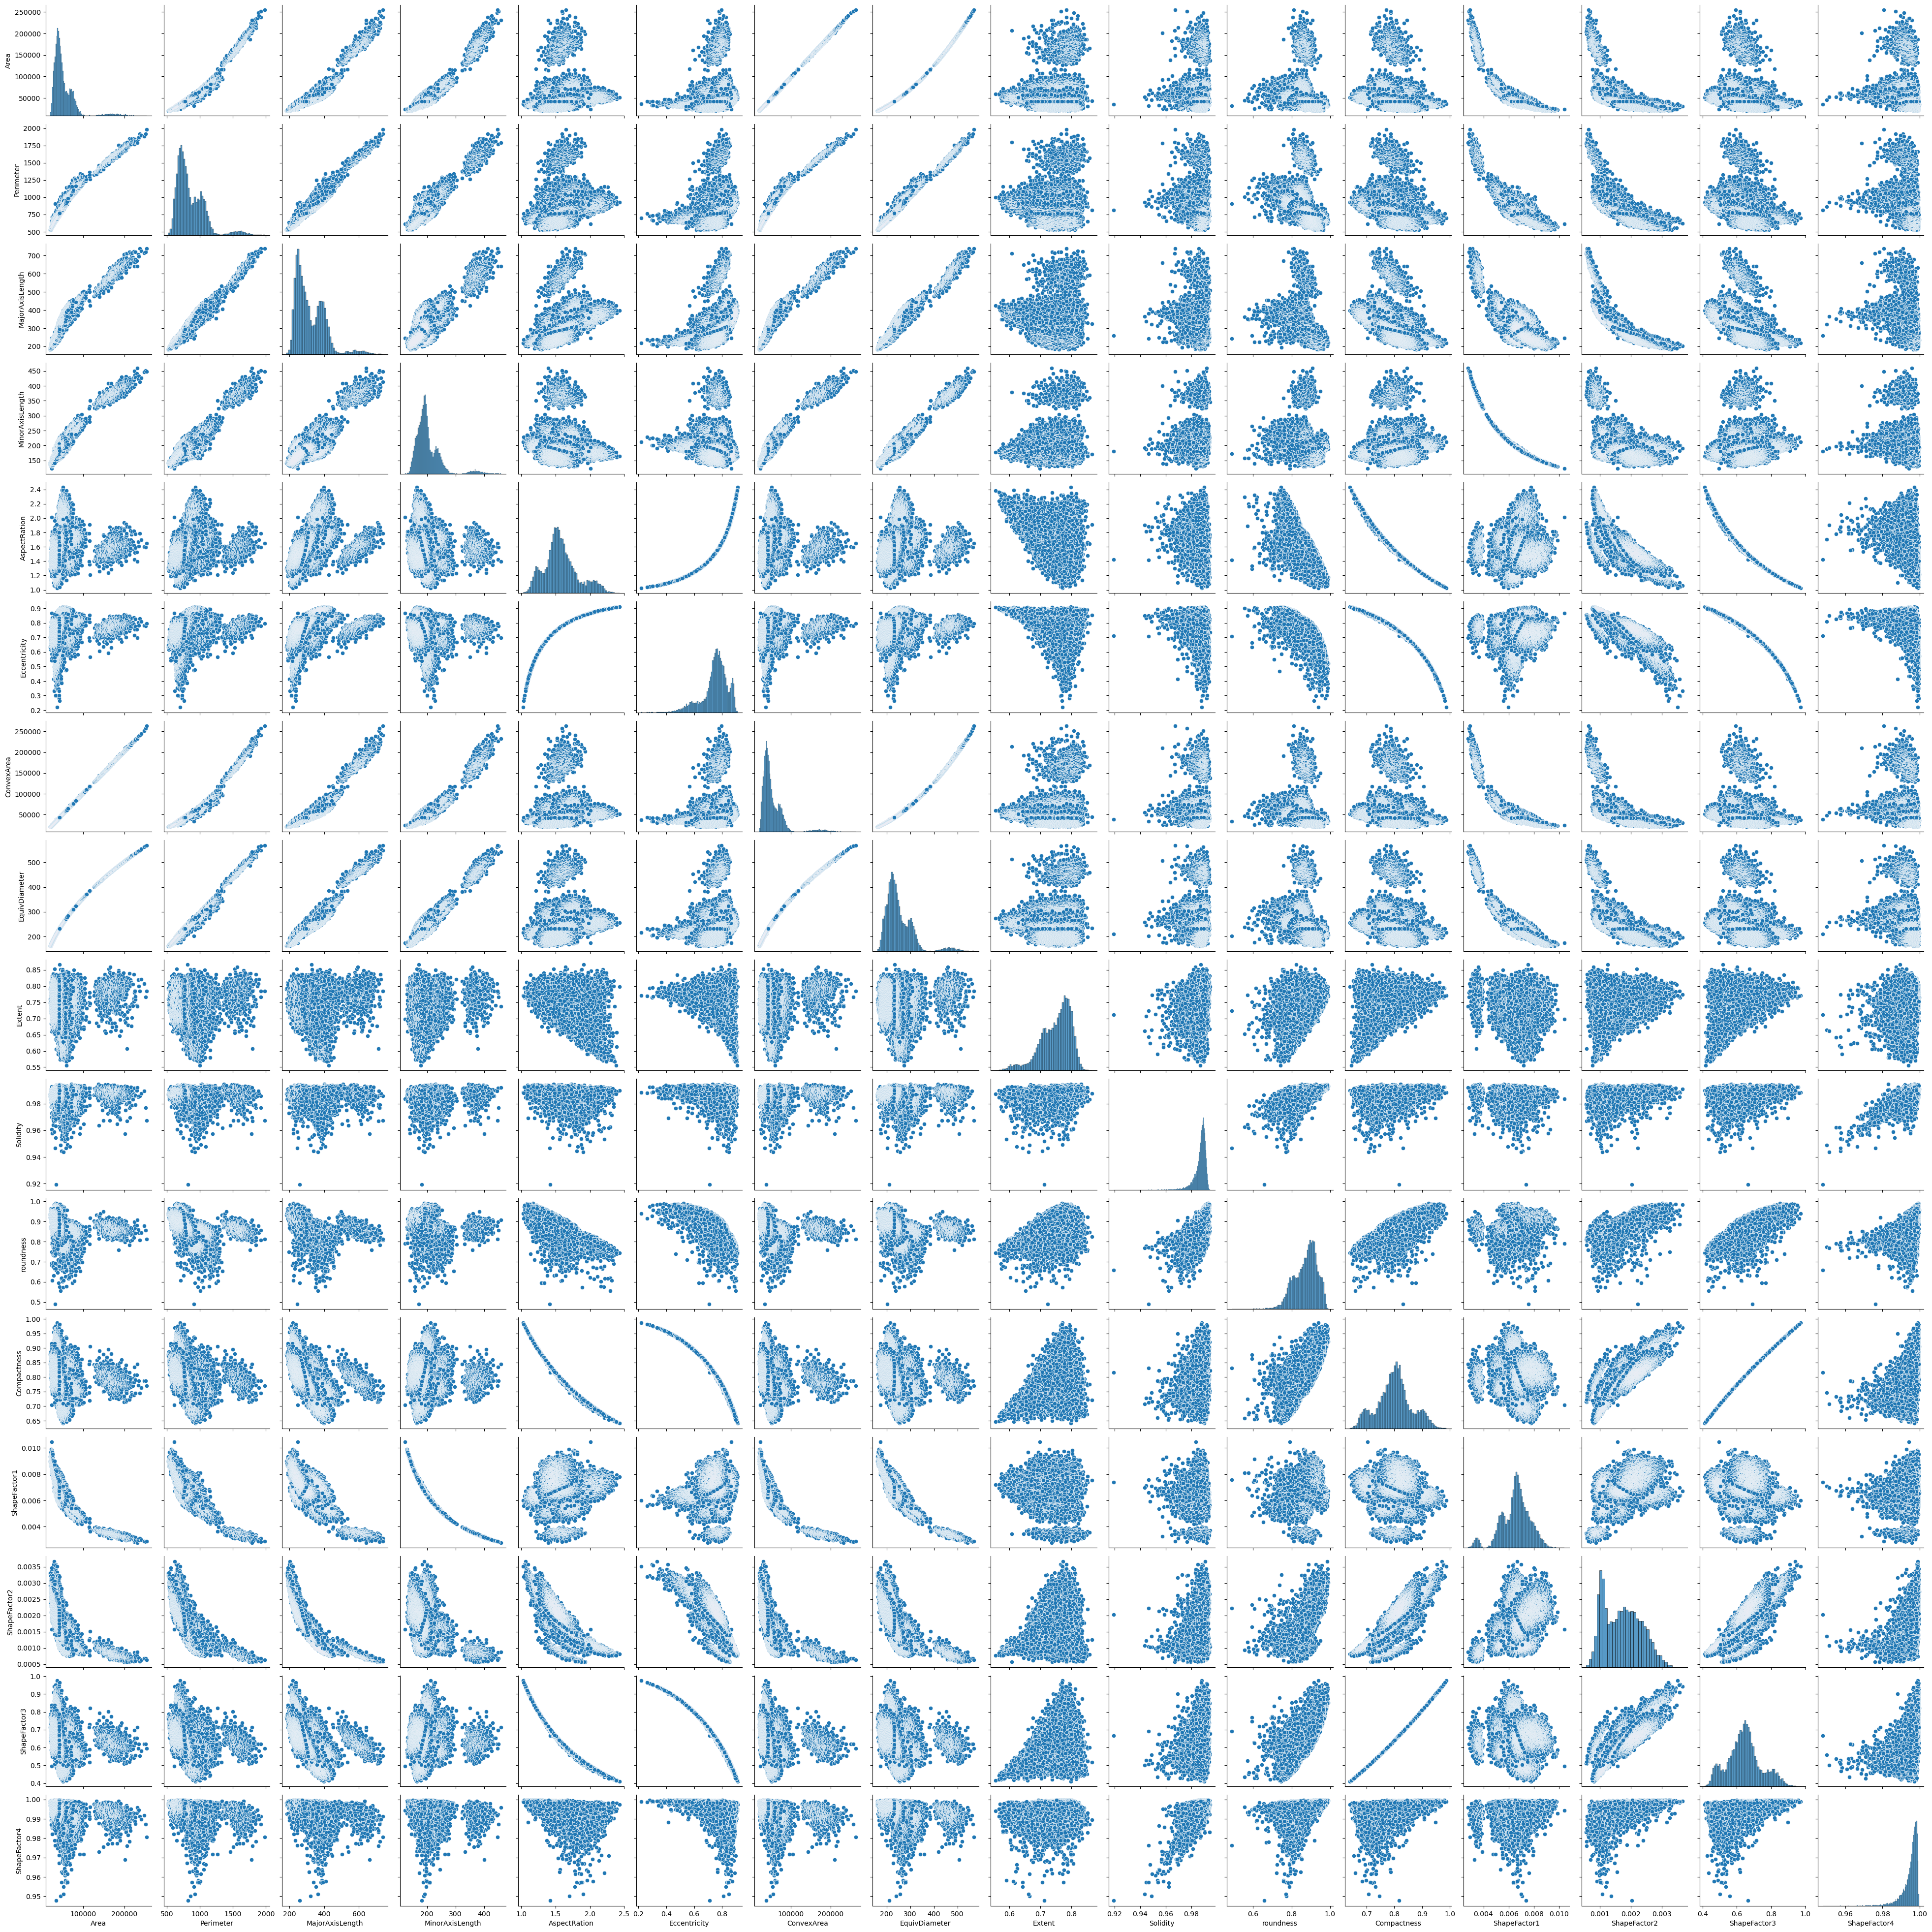

In [14]:
sns.pairplot(df)

## Heatmap

In [15]:
df.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.00       0.97             0.93             0.95   
Perimeter        0.97       1.00             0.98             0.91   
MajorAxisLength  0.93       0.98             1.00             0.83   
MinorAxisLength  0.95       0.91             0.83             1.00   
AspectRation     0.24       0.39             0.55            -0.01   
Eccentricity     0.27       0.39             0.54             0.02   
ConvexArea       1.00       0.97             0.93             0.95   
EquivDiameter    0.98       0.99             0.96             0.95   
Extent           0.05      -0.02            -0.08             0.15   
Solidity        -0.20      -0.30            -0.28            -0.16   
roundness       -0.36      -0.55            -0.60            -0.21   
Compactness     -0.27      -0.41            -0.57            -0.02   
ShapeFactor1    -0.85      -0.87            -0.78            -0.95   
ShapeFactor2    -0.64      -0.77            -0.86            -0.48   
ShapeFactor3    -0.27      -0.41            -0.57            -0.02   
ShapeFactor4    -0.36      -0.43            -0.48            -0.27   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                     0.24          0.27        1.00           0.98   
Perimeter                0.39          0.39        0.97           0.99   
MajorAxisLength          0.55          0.54        0.93           0.96   
MinorAxisLength         -0.01          0.02        0.95           0.95   
AspectRation             1.00          0.92        0.25           0.31   
Eccentricity             0.92          1.00        0.27           0.32   
ConvexArea               0.25          0.27        1.00           0.99   
EquivDiameter            0.31          0.32        0.99           1.00   
Extent                  -0.37         -0.32        0.05           0.03   
Solidity                -0.27         -0.30       -0.21          -0.23   
roundness               -0.76         -0.72       -0.36          -0.44   
Compactness             -0.99         -0.97       -0.27          -0.33   
ShapeFactor1             0.02          0.02       -0.85          -0.89   
ShapeFactor2            -0.84         -0.86       -0.64          -0.71   
ShapeFactor3            -0.98         -0.98       -0.28          -0.33   
ShapeFactor4            -0.45         -0.45       -0.36          -0.39   

                 Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area               0.05     -0.20      -0.36        -0.27         -0.85   
Perimeter         -0.02     -0.30      -0.55        -0.41         -0.87   
MajorAxisLength   -0.08     -0.28      -0.60        -0.57         -0.78   
MinorAxisLength    0.15     -0.16      -0.21        -0.02         -0.95   
AspectRation      -0.37     -0.27      -0.76        -0.99          0.02   
Eccentricity      -0.32     -0.30      -0.72        -0.97          0.02   
ConvexArea         0.05     -0.21      -0.36        -0.27         -0.85   
EquivDiameter      0.03     -0.23      -0.44        -0.33         -0.89   
Extent             1.00      0.19       0.34         0.35         -0.14   
Solidity           0.19      1.00       0.61         0.30          0.15   
roundness          0.34      0.61       1.00         0.77          0.23   
Compactness        0.35      0.30       0.77         1.00         -0.01   
ShapeFactor1      -0.14      0.15       0.23        -0.01          1.00   
ShapeFactor2       0.24      0.34       0.78         0.87          0.47   
ShapeFactor3       0.35      0.31       0.76         1.00         -0.01   
ShapeFactor4       0.15      0.70       0.47         0.49          0.25   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                    -0.64         -0.27         -0.36  
Perimeter               -0.77         -0.41         -0.43  
MajorAxisLength         -0.86         -0.57         -0.48  
MinorAxisLength         -0.48         -0.02        

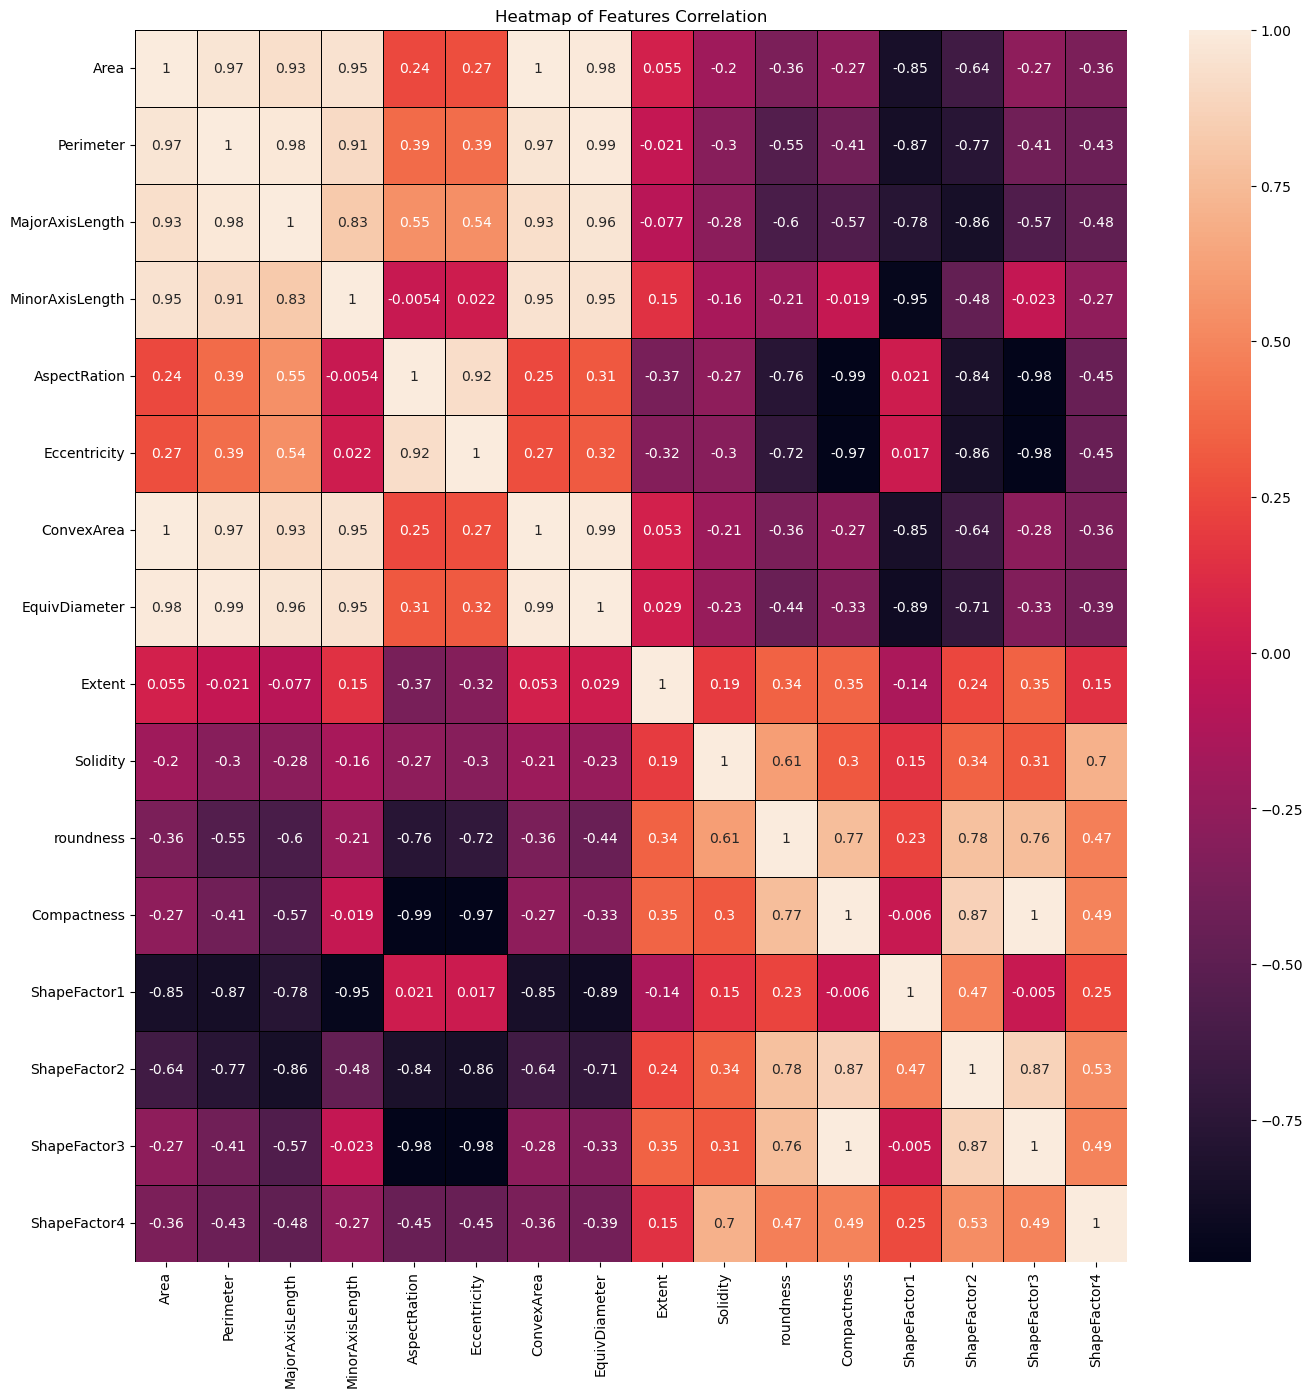

In [16]:
corr=df.corr()
plt.subplots(figsize = (16, 16))
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr, linewidth = 0.60, annot=True,linecolor='black',robust=True)
plt.show()

## Box Plot

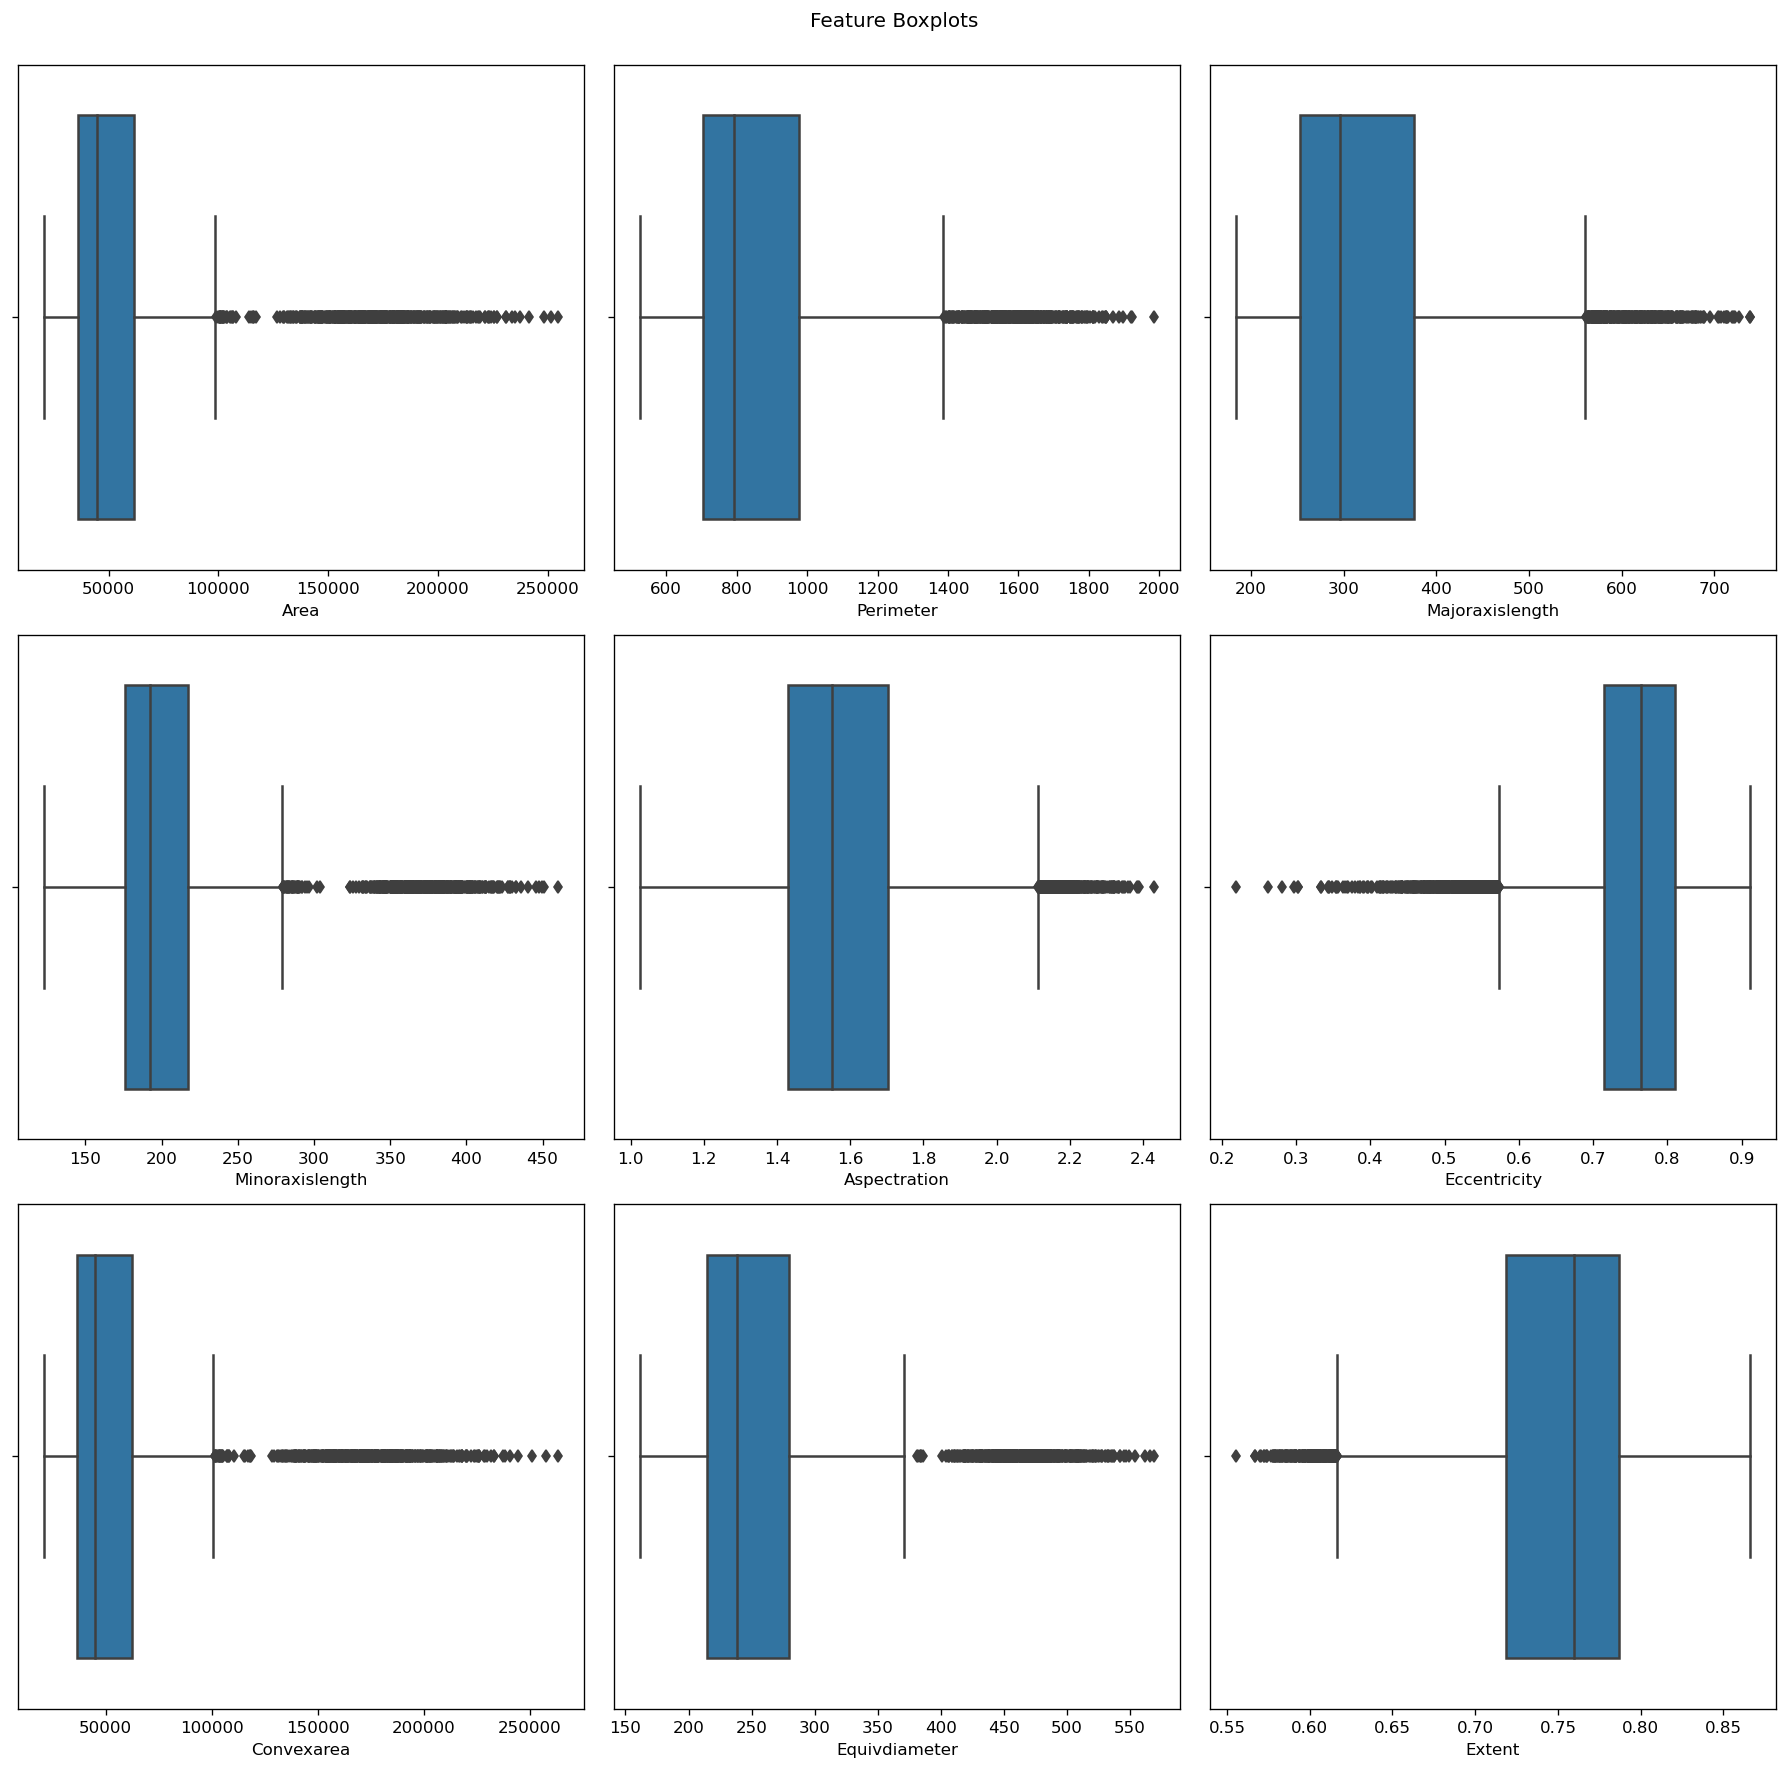

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=120)
for i, j in zip(corr[:8], axes.flatten()):
    sns.boxplot(data=df, x=i, ax=j)
    j.set_xlabel(f"{i.title().replace('_', ' ')}")
plt.suptitle(f"Feature Boxplots")
plt.tight_layout()
plt.subplots_adjust(top=0.95);
plt.show()

### Insights: 1. Data is Already Imbalanced; 2. Data Contain Outlier That Require Handling; 3. Data Features Skewness Needed Workout

## Lets Check How Unbalance the Data is 

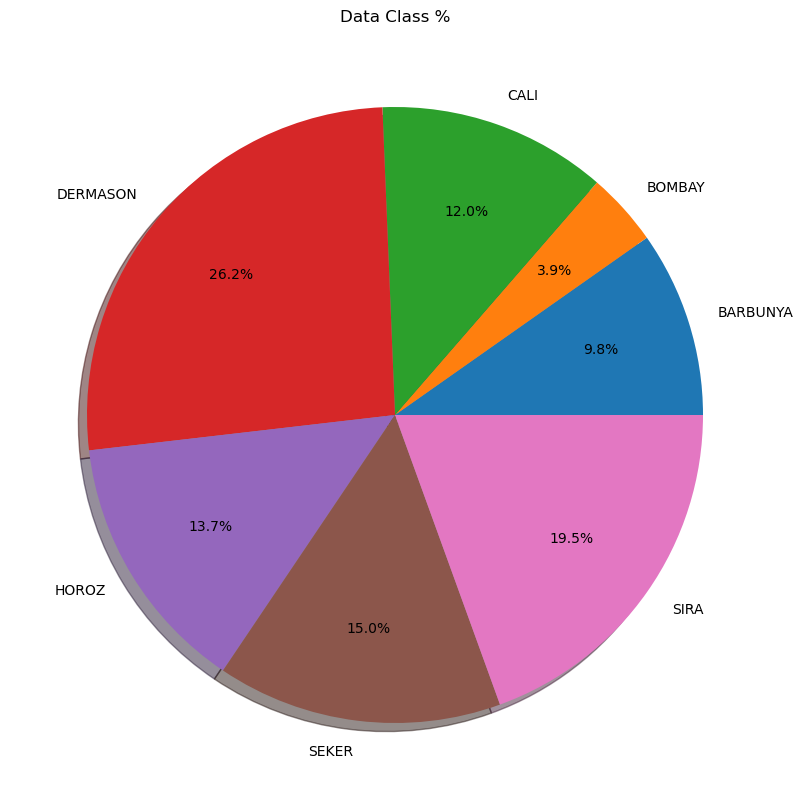

In [18]:
labels, counts = np.unique(df.Class, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Data Class %')
plt.show()

# Lets Try Balancing Data (SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)

## Defining Target Variable

In [20]:
X = df.drop('Class', axis=1)
y = df.Class

In [21]:
X_smote, y_smote = smote.fit_resample(X, y)

## Lets Check New Data

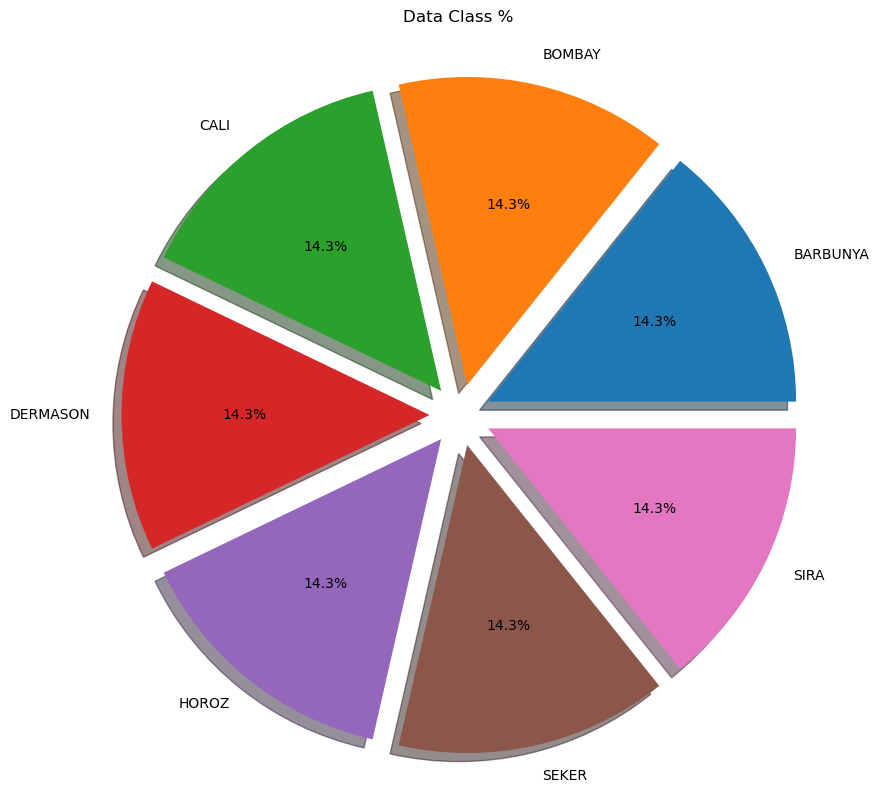

In [22]:
labels, counts = np.unique(y_smote, return_counts=True)
myexplode=[0.10,0.10,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels,explode = myexplode,shadow=True)

plt.title('Data Class % ')
plt.show()

# Data Cleaning

## One-Hot-Encoding for df["Class"]

In [23]:
list(np.unique(y_smote))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [24]:
y_smote.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_smote)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

# Droping Highly Correlated Features/Columns

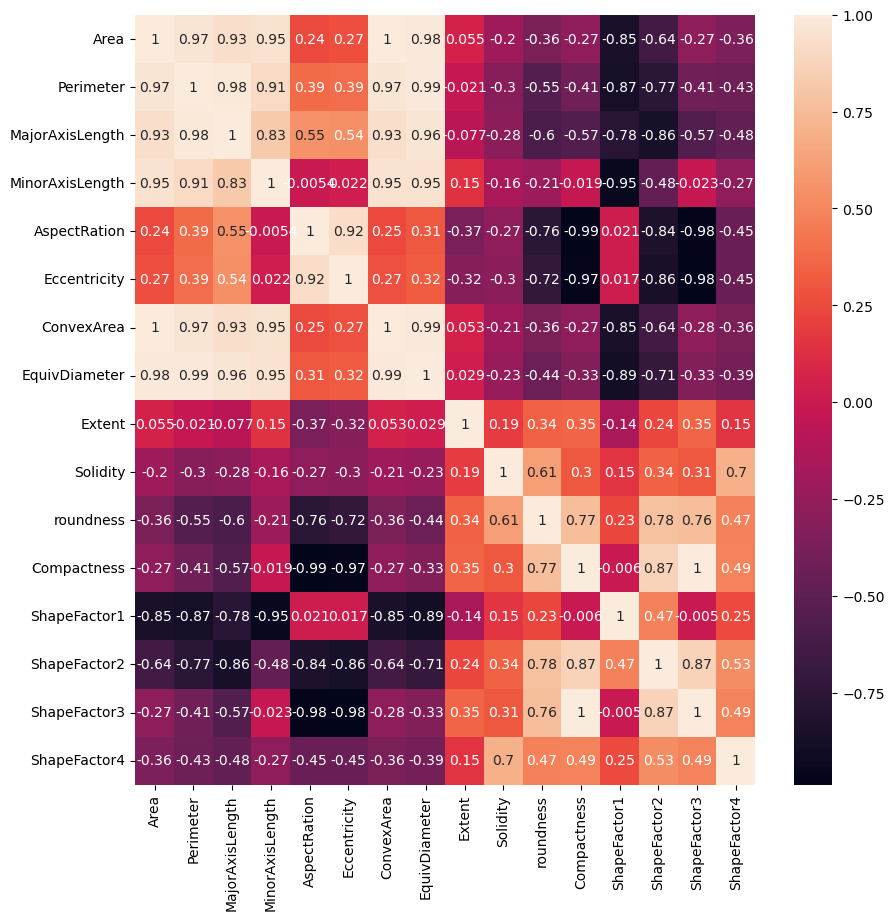

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### As per this Heat Map We can Say That Convex Area is Directly Propotional to Area,Perimeter,MajorAxisLength,MinorAxisLength and EquiDiameter Also

## Droping Unusual Features

In [26]:
X_smote.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

In [27]:
X_smote.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395     610.29           208.18           173.89          1.20   
1  28734     638.02           200.52           182.73          1.10   
2  29380     624.11           212.83           175.93          1.21   
3  30008     645.88           210.56           182.52          1.15   
4  30140     620.13           201.85           190.28          1.06   

   Eccentricity  Extent  Solidity  roundness  Compactness  ShapeFactor1  \
0          0.55    0.76      0.99       0.96         0.91          0.01   
1          0.41    0.78      0.98       0.89         0.95          0.01   
2          0.56    0.78      0.99       0.95         0.91          0.01   
3          0.50    0.78      0.98       0.90         0.93          0.01   
4          0.33    0.77      0.99       0.98         0.97          0.01   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  
0          0.00          0.83          1.00  
1          0.00          0.91          1.00  
2          0.00          0.83          1.00  
3          0.00          0.86          0.99  
4          0.00          0.94          1.00

# Train Test And Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=42, shuffle=True, test_size=0.27)

### Using Standard Scaler 

In [29]:
from sklearn.preprocessing import StandardScaler # Importing Standered Scaler


ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-0.54247673, -0.41961171, -0.07278836, ..., -0.86745947,
        -1.86672207,  0.50718122],
       [-0.82226684, -0.99890846, -1.07615867, ...,  1.26368387,
         0.73448674,  0.42940454],
       [-0.56774767, -0.63963031, -0.6215012 , ...,  0.35210775,
         0.1685614 ,  0.60806277],
       ...,
       [-0.12087281, -0.06489165, -0.0992275 , ..., -0.1023957 ,
         0.25277487,  0.63127789],
       [-0.21358381, -0.04015149, -0.12152248, ..., -0.21060005,
        -0.10123957,  0.69633749],
       [-0.6819139 , -0.83253438, -0.86110533, ...,  0.87367026,
         0.64893926,  0.41975673]])

#  Lets Check Which Model Will Be Better

In [30]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [31]:
# Fitting the model on the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:13<00:00, 10.79s/it]


In [32]:
# Printing the performance metrics of the models
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.95               0.95    None      0.95   
ExtraTreesClassifier               0.95               0.95    None      0.95   
RandomForestClassifier             0.95               0.95    None      0.95   
LabelSpreading                     0.95               0.95    None      0.95   
LabelPropagation                   0.95               0.95    None      0.95   
SVC                                0.95               0.95    None      0.95   
BaggingClassifier                  0.95               0.95    None      0.95   
KNeighborsClassifier               0.95               0.95    None      0.95   
LogisticRegression                 0.95               0.95    None      0.95   
CalibratedClassifierCV             0.94               0.94    None      0.94   
LinearSVC                          0.94 

### Here You Can Find Diffrent Algorithm with their Accuracy and F1 Score and Time Taken Also Lets Try One of these aving Best Accuracy

## Lets Try Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier


In [54]:
# model

dtc = DecisionTreeClassifier(max_depth=7)

#fitting

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [55]:
# predicting via Decision Tree Algorithm

y_pred=dtc.predict(X_test)

y_pred

array(['HOROZ', 'DERMASON', 'SIRA', ..., 'BARBUNYA', 'BARBUNYA',
       'DERMASON'], dtype=object)

In [56]:
# compute accuracy on training set 

dtc_train= dtc.score(X_train,y_train)

print("Training Data Accuracy by Decision Tree Algorithm is : " , round(dtc_train,2))

# compute accuracy on testing set 

dtc_test= dtc.score(X_test,y_test)

print("Testing Data Accuracy by Decision Tree Algorithm is : " , round(dtc_test,2))



Training Data Accuracy by Decision Tree Algorithm is :  0.94
Testing Data Accuracy by Decision Tree Algorithm is :  0.93


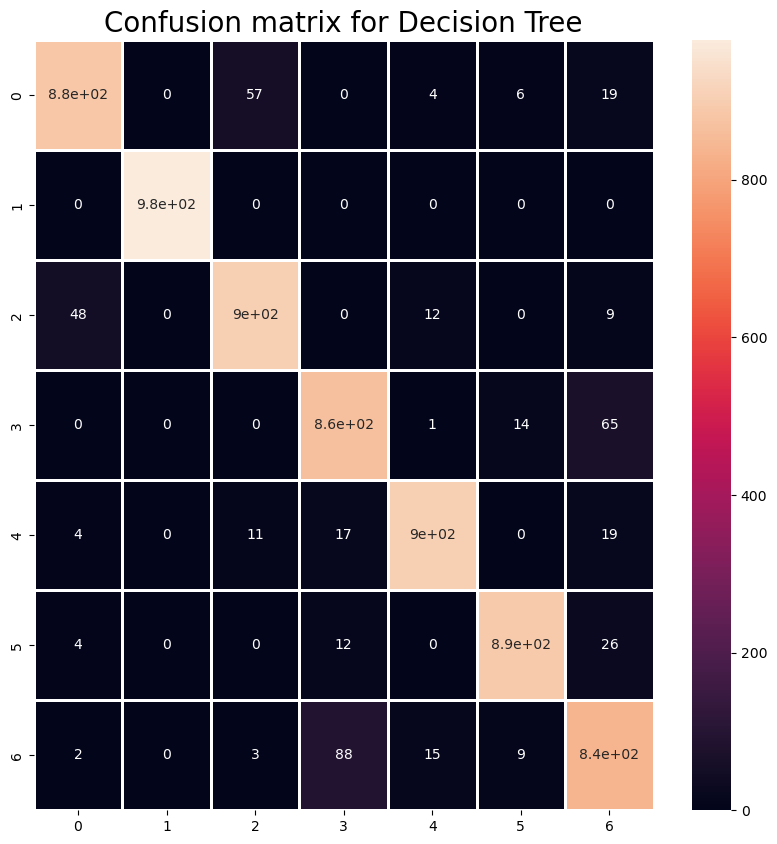

In [37]:
# lets find out our model performance

from sklearn.metrics import confusion_matrix

#Lets print the confusion metrix for this model

plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,linewidths=1,linecolor='white',cbar=True)
plt.title("Confusion matrix for Decision Tree",fontsize=20)
plt.show()


In [58]:
X_smote.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395     610.29           208.18           173.89          1.20   
1  28734     638.02           200.52           182.73          1.10   
2  29380     624.11           212.83           175.93          1.21   
3  30008     645.88           210.56           182.52          1.15   
4  30140     620.13           201.85           190.28          1.06   

   Eccentricity  Extent  Solidity  roundness  Compactness  ShapeFactor1  \
0          0.55    0.76      0.99       0.96         0.91          0.01   
1          0.41    0.78      0.98       0.89         0.95          0.01   
2          0.56    0.78      0.99       0.95         0.91          0.01   
3          0.50    0.78      0.98       0.90         0.93          0.01   
4          0.33    0.77      0.99       0.98         0.97          0.01   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  
0          0.00          0.83          1.00  
1          0.00          0.91          1.00  
2          0.00          0.83          1.00  
3          0.00          0.86          0.99  
4          0.00          0.94          1.00

In [59]:
# what is the process the model uses to generate its predictions, Lets Check?
new_check = dtc.predict((np.array([[28734,638.02,200.52,182.73,1.10,0.41,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00]])))
print("Provide Class : ",new_check)

Provide Class :  ['DERMASON']


In [64]:
# what is the process the model uses to generate its predictions, Lets Check?
new_check = dtc.predict((np.array([[14000,300,150,175.73,2.10,0.81,0.98,0.80,0.59,0.01,0.00,0.00,0.91,1.00]])))
print("Provide Class : ",new_check)

Provide Class :  ['BOMBAY']


In [60]:
# Lets print the classifiction report also
from sklearn.metrics import classification_report
cr =classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       968
      BOMBAY       1.00      1.00      1.00       977
        CALI       0.93      0.93      0.93       973
    DERMASON       0.88      0.92      0.90       944
       HOROZ       0.97      0.95      0.96       952
       SEKER       0.97      0.95      0.96       935
        SIRA       0.86      0.88      0.87       953

    accuracy                           0.93      6702
   macro avg       0.93      0.93      0.93      6702
weighted avg       0.93      0.93      0.93      6702



### High precision indicates that the model is making less false positive predicions 
### While high recall signifies that the model is making lesser false negative predictions
### We can conclude our model is working eficiently, recall and f1-score

## Created by Bharat Bhushan Kulmani